In [39]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [40]:
#Load data for train
train = pd.read_csv('C:/Users/rvaish/Documents/Python Scripts/house_data.csv')


In [41]:
#Shape of train data
train.shape

(21613, 21)

Skew is: 0.4280765149574905


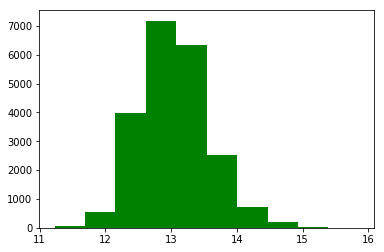

In [42]:
train['price'] = np.log1p(train['price'])

target = train['price']
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [43]:
#Finding Numerical Columns
numeric_features = train.select_dtypes(include=[np.number])

In [44]:
#Finding the first five features are the most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['price'].sort_values(ascending=False)[:5], '\n')

price            1.000000
grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601802
Name: price, dtype: float64 



In [45]:
#Understanding NULL values.
Isnull=train.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64


In [46]:
#The total number of columns = 81
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [47]:
len(train.columns)

21

In [48]:
#Numerical Columns = 20
len(train.select_dtypes(include=[np.number]).columns.tolist())

20

In [49]:
#Non-Numerical Columns = 1
len(train.select_dtypes(exclude=[np.number]).columns.tolist())

1

In [50]:
del train['date']

In [51]:
len(train.columns)

20

In [52]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

In [53]:
model = linear_model.LinearRegression()

In [54]:
selectdColumns = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [55]:
model.fit(train[selectdColumns], train["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
all_X = train[selectdColumns]
all_y = train['price']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)

[12.94906571 14.52669117 12.98762643 ... 12.88817217 12.51289768
 12.90985668]


In [57]:
scores = cross_val_score(model, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print('----')
print(accuracy)

[0.73714555 0.75919295 0.76015995 0.76423259 0.77024191 0.77163446
 0.77325175 0.77439056 0.77461128 0.77782369]
----
0.7662684694951574


In [ ]:

############  NOW TIME TO USE UNSEEN DATA ##########################

In [469]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [ ]:
model.fit(train[selectdColumns], train["price"])

In [465]:
#Take targate variable into y
y = train['price']

In [466]:
#Delete the saleprice
del train['price']

In [467]:
#Take their values in X and y
X = train.values
y = y.values

In [468]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [470]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [472]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [12.08629714]
Real value 11.995357787034976


In [473]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  87.32970307647076


In [474]:
scores = cross_val_score(model, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)


NameError: name 'cross_val_score' is not defined

In [ ]:

rf = RandomForestClassifier (n_estimators=100)
rf.fit(all_X,all_y)
predictions = rf.predict(holdout[selectdColumns])


accuracy = accuracy_score(cheatvalues, predictions)

In [ ]:
#+ ('MSSubClass', 'OverallCond','YrSold', 'MoSold', 'MasVnrArea')

### RandomForestRegression

In [259]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [385]:
selectedColumns = ('OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea')
#Take targate variable into y
y = train['SalePrice']
#Delete the saleprice
del train['SalePrice']
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
model.fit(X_train, y_train)
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

KeyError: 'SalePrice'

In [260]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [261]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  90.56618132951972
